GROUP B
STUDENT NAME	STUDENT CONTRIBUTION	
EXPLORATORY DATA ANALYSIS	
ANJU SUNNY CHUNGATH	Univariate Analysis	
	Bivariate Analysis	
DATA PROCESSING AND FEATURE ENGG	
UTSAV HARSHADBHAI KHAMAR	Imputing Missing and Extreme Values	
MODELING AND CODE QUALITY	
VAMSI KRISHNA MARADANI	Lasso	25
SHAHNAZ PALAKUNNIL MOOSA	Decision Tree, Random Forest	25
MOKSH NARESH JAISWAL

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_json('C:\\Users\\Admin\\Documents\\ML Project\\ML2_project\\yelp_dataset\\yelp_academic_dataset_business.json',lines=True)
col =['address','state','postal_code','latitude','longitude','attributes']
df1. drop(col, axis=1, inplace=True)
df1.head()

,business_id,name,city,stars,review_count,is_open,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,1,"Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
df2 = pd.read_json('C:\\Users\\Admin\\Documents\\ML Project\\ML2_project\\yelp_dataset\\yelp_academic_dataset_checkin.json',lines=True)
df2.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [5]:
chunks = []

# Load the file in chunks
chunksize = 100  # Adjust the chunk size based on memory capacity
for chunk in pd.read_json('C:\\Users\\Admin\\Documents\\ML Project\\ML2_project\\yelp_dataset\\yelp_academic_dataset_review.json', lines=True, chunksize=chunksize):
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# Show the first few rows of the DataFrame
col= ['review_id','text']
df.drop(col,axis=1,inplace=True)
df.head()


,user_id,business_id,stars,useful,funny,cool,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,2018-07-07 22:09:11
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,2012-01-03 15:28:18
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,2014-02-05 20:30:30
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,2015-01-04 00:01:03
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,2017-01-14 20:54:15


In [6]:
df4 = pd.read_json('C:\\Users\\Admin\\Documents\\ML Project\\ML2_project\\yelp_dataset\\yelp_academic_dataset_tip.json',lines=True)
df4.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [7]:
chunks2 = []

# Load the file in chunks
chunksize = 100  # Adjust the chunk size based on memory capacity
for chunk in pd.read_json('C:\\Users\\Admin\\Documents\\ML Project\\ML2_project\\yelp_dataset\\yelp_academic_dataset_user.json', lines=True, chunksize=chunksize):
    chunks2.append(chunk)

# Concatenate all chunks into a single DataFrame
df5 = pd.concat(chunks2, ignore_index=True)

# Show the first few rows of the DataFrame
df5.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [8]:
count5 = df5.shape
count5

(1987897, 22)

In [9]:
df1.shape

(150346, 8)

In [10]:
df2.shape

(131930, 2)

In [11]:
df.shape


(6990280, 7)

In [12]:
df4.shape

(908915, 5)

In [13]:
merged_df = pd.merge(df1, df, on='business_id')




In [14]:
merged_df.head()

,business_id,name,city,stars_x,review_count,is_open,categories,hours,user_id,stars_y,useful,funny,cool,date
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,e0imecnX_9MtLnS2rUZM-A,5,3,2,1,2012-05-02 18:07:38
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,_Q0fdLVoTnlNkEypUvNkHA,5,1,0,0,2013-03-01 06:11:05
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,ycUooVIDWPgXPf6niW-FWQ,4,2,0,0,2013-01-17 00:05:43
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,CiwVvb7jWijWB5jkmatzKA,5,0,1,0,2015-03-16 03:43:08
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,QkCbMKBktkrkOFJugHvY6w,5,0,0,0,2013-03-05 18:45:07


In [15]:
merged_df.shape


(6990280, 14)

In [16]:
merged_df = pd.merge(merged_df, df5, on='user_id')

In [17]:
merged_df.head()

,business_id,name_x,city,stars_x,review_count_x,is_open,categories,hours,user_id,stars_y,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,e0imecnX_9MtLnS2rUZM-A,5,...,0,0,0,0,2,3,1,1,1,0
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,_Q0fdLVoTnlNkEypUvNkHA,5,...,0,0,0,0,0,0,0,0,0,0
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,ycUooVIDWPgXPf6niW-FWQ,4,...,0,0,0,0,0,0,0,0,0,0
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,CiwVvb7jWijWB5jkmatzKA,5,...,0,0,0,0,1,0,0,0,0,0
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,QkCbMKBktkrkOFJugHvY6w,5,...,0,0,0,0,0,0,0,0,0,0


In [18]:
merged_df.shape


(6990247, 35)

In [19]:
# Reset the index to default integers (0, 1, 2, ...)
merged_df = merged_df.set_index('business_id')
merged_df.head()

,name_x,city,stars_x,review_count_x,is_open,categories,hours,user_id,stars_y,useful_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
business_id,,,,,,,,,,,,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,e0imecnX_9MtLnS2rUZM-A,5,3,...,0,0,0,0,2,3,1,1,1,0
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,_Q0fdLVoTnlNkEypUvNkHA,5,1,...,0,0,0,0,0,0,0,0,0,0
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,ycUooVIDWPgXPf6niW-FWQ,4,2,...,0,0,0,0,0,0,0,0,0,0
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,CiwVvb7jWijWB5jkmatzKA,5,0,...,0,0,0,0,1,0,0,0,0,0
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",None,QkCbMKBktkrkOFJugHvY6w,5,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
merged_df.columns

Index(['name_x', 'city', 'stars_x', 'review_count_x', 'is_open', 'categories',
       'hours', 'user_id', 'stars_y', 'useful_x', 'funny_x', 'cool_x', 'date',
       'name_y', 'review_count_y', 'yelping_since', 'useful_y', 'funny_y',
       'cool_y', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [21]:
merged_df['stars_x']

business_id
Pns2l4eNsfO8kk83dixA6A    5.0
Pns2l4eNsfO8kk83dixA6A    5.0
Pns2l4eNsfO8kk83dixA6A    5.0
Pns2l4eNsfO8kk83dixA6A    5.0
Pns2l4eNsfO8kk83dixA6A    5.0
                         ... 
jV_XOycEzSlTx-65W906pg    4.5
jV_XOycEzSlTx-65W906pg    4.5
jV_XOycEzSlTx-65W906pg    4.5
jV_XOycEzSlTx-65W906pg    4.5
jV_XOycEzSlTx-65W906pg    4.5
Name: stars_x, Length: 6990247, dtype: float64

In [22]:
merged_df['stars_y']

business_id
Pns2l4eNsfO8kk83dixA6A    5
Pns2l4eNsfO8kk83dixA6A    5
Pns2l4eNsfO8kk83dixA6A    4
Pns2l4eNsfO8kk83dixA6A    5
Pns2l4eNsfO8kk83dixA6A    5
                         ..
jV_XOycEzSlTx-65W906pg    5
jV_XOycEzSlTx-65W906pg    5
jV_XOycEzSlTx-65W906pg    5
jV_XOycEzSlTx-65W906pg    5
jV_XOycEzSlTx-65W906pg    1
Name: stars_y, Length: 6990247, dtype: int64

In [23]:
# Calculate the correlation between stars_y and stars_x
correlation = merged_df['stars_y'].corr(merged_df['stars_x'])

print(f"Correlation between stars_y and stars_x: {correlation}")


Correlation between stars_y and stars_x: 0.489411506720068


In [24]:
# Correlate 'stars_x' with all other columns in the DataFrame
col= [ 'stars_x', 'review_count_x', 'is_open',
        'stars_y', 'useful_x', 'funny_x',
       'cool_x', 'review_count_y', 
       'useful_y', 'funny_y', 'cool_y', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos']
correlations_with_stars_x = merged_df.corrwith(merged_df[col])

print(correlations_with_stars_x)


stars_x               1.0
review_count_x        1.0
is_open               1.0
stars_y               1.0
useful_x              1.0
funny_x               1.0
cool_x                1.0
review_count_y        1.0
useful_y              1.0
funny_y               1.0
cool_y                1.0
fans                  1.0
average_stars         1.0
compliment_hot        1.0
compliment_more       1.0
compliment_profile    1.0
compliment_cute       1.0
compliment_list       1.0
compliment_note       1.0
compliment_plain      1.0
compliment_cool       1.0
compliment_funny      1.0
compliment_writer     1.0
compliment_photos     1.0
categories            NaN
city                  NaN
date                  NaN
elite                 NaN
friends               NaN
hours                 NaN
name_x                NaN
name_y                NaN
user_id               NaN
yelping_since         NaN
dtype: float64


In [25]:
merged_df.describe()

,stars_x,review_count_x,is_open,stars_y,useful_x,funny_x,cool_x,date,review_count_y,useful_y,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6990247,6.990247e+06,6.990247e+06,...,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06,6.990247e+06
mean,3.751329e+00,3.691727e+02,8.284687e-01,3.748584e+00,1.184615e+00,3.265611e-01,4.986199e-01,2017-01-11 11:10:05.264180480,1.238333e+02,4.279901e+02,...,2.370812e+00,1.565922e+00,9.992146e-01,6.759509e-01,1.602984e+01,4.419397e+01,3.034152e+01,3.034152e+01,1.108569e+01,1.299869e+01
min,1.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2005-02-16 03:23:22,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+00,4.300000e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-25 04:47:37,7.000000e+00,3.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.350000e+02,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2017-06-03 01:19:34,2.400000e+01,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.500000e+00,3.640000e+02,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2019-05-22 23:52:36,9.800000e+01,1.110000e+02,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00
max,5.000000e+00,7.568000e+03,1.000000e+00,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02,2022-01-19 19:48:45,1.747300e+04,2.062960e+05,...,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04
std,7.539320e-01,7.360805e+02,3.769726e-01,1.478702e+00,3.253774e+00,1.688733e+00,2.172465e+00,NaN,3.634315e+02,3.226596e+03,...,3.150277e+01,4.007215e+01,2.466833e+01,2.201955e+01,1.598069e+02,5.476234e+02,3.264441e+02,3.264441e+02,1.113880e+02,2.723352e+02


In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6990247 entries, Pns2l4eNsfO8kk83dixA6A to jV_XOycEzSlTx-65W906pg
Data columns (total 34 columns):
 #   Column              Dtype         
---  ------              -----         
 0   name_x              object        
 1   city                object        
 2   stars_x             float64       
 3   review_count_x      int64         
 4   is_open             int64         
 5   categories          object        
 6   hours               object        
 7   user_id             object        
 8   stars_y             int64         
 9   useful_x            int64         
 10  funny_x             int64         
 11  cool_x              int64         
 12  date                datetime64[ns]
 13  name_y              object        
 14  review_count_y      int64         
 15  yelping_since       object        
 16  useful_y            int64         
 17  funny_y             int64         
 18  cool_y              int64         
 19  elite      

In [27]:
# Getting the count of null values for all attributes
merged_df.isna().sum()

name_x                     0
city                       0
stars_x                    0
review_count_x             0
is_open                    0
categories               689
hours                 398285
user_id                    0
stars_y                    0
useful_x                   0
funny_x                    0
cool_x                     0
date                       0
name_y                     0
review_count_y             0
yelping_since              0
useful_y                   0
funny_y                    0
cool_y                     0
elite                      0
friends                    0
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

array([[<Axes: title={'center': 'stars_x'}>,
        <Axes: title={'center': 'review_count_x'}>,
        <Axes: title={'center': 'is_open'}>,
        <Axes: title={'center': 'stars_y'}>,
        <Axes: title={'center': 'useful_x'}>],
       [<Axes: title={'center': 'funny_x'}>,
        <Axes: title={'center': 'cool_x'}>,
        <Axes: title={'center': 'review_count_y'}>,
        <Axes: title={'center': 'useful_y'}>,
        <Axes: title={'center': 'funny_y'}>],
       [<Axes: title={'center': 'cool_y'}>,
        <Axes: title={'center': 'fans'}>,
        <Axes: title={'center': 'average_stars'}>,
        <Axes: title={'center': 'compliment_hot'}>,
        <Axes: title={'center': 'compliment_more'}>],
       [<Axes: title={'center': 'compliment_profile'}>,
        <Axes: title={'center': 'compliment_cute'}>,
        <Axes: title={'center': 'compliment_list'}>,
        <Axes: title={'center': 'compliment_note'}>,
        <Axes: title={'center': 'compliment_plain'}>],
       [<Axes: title

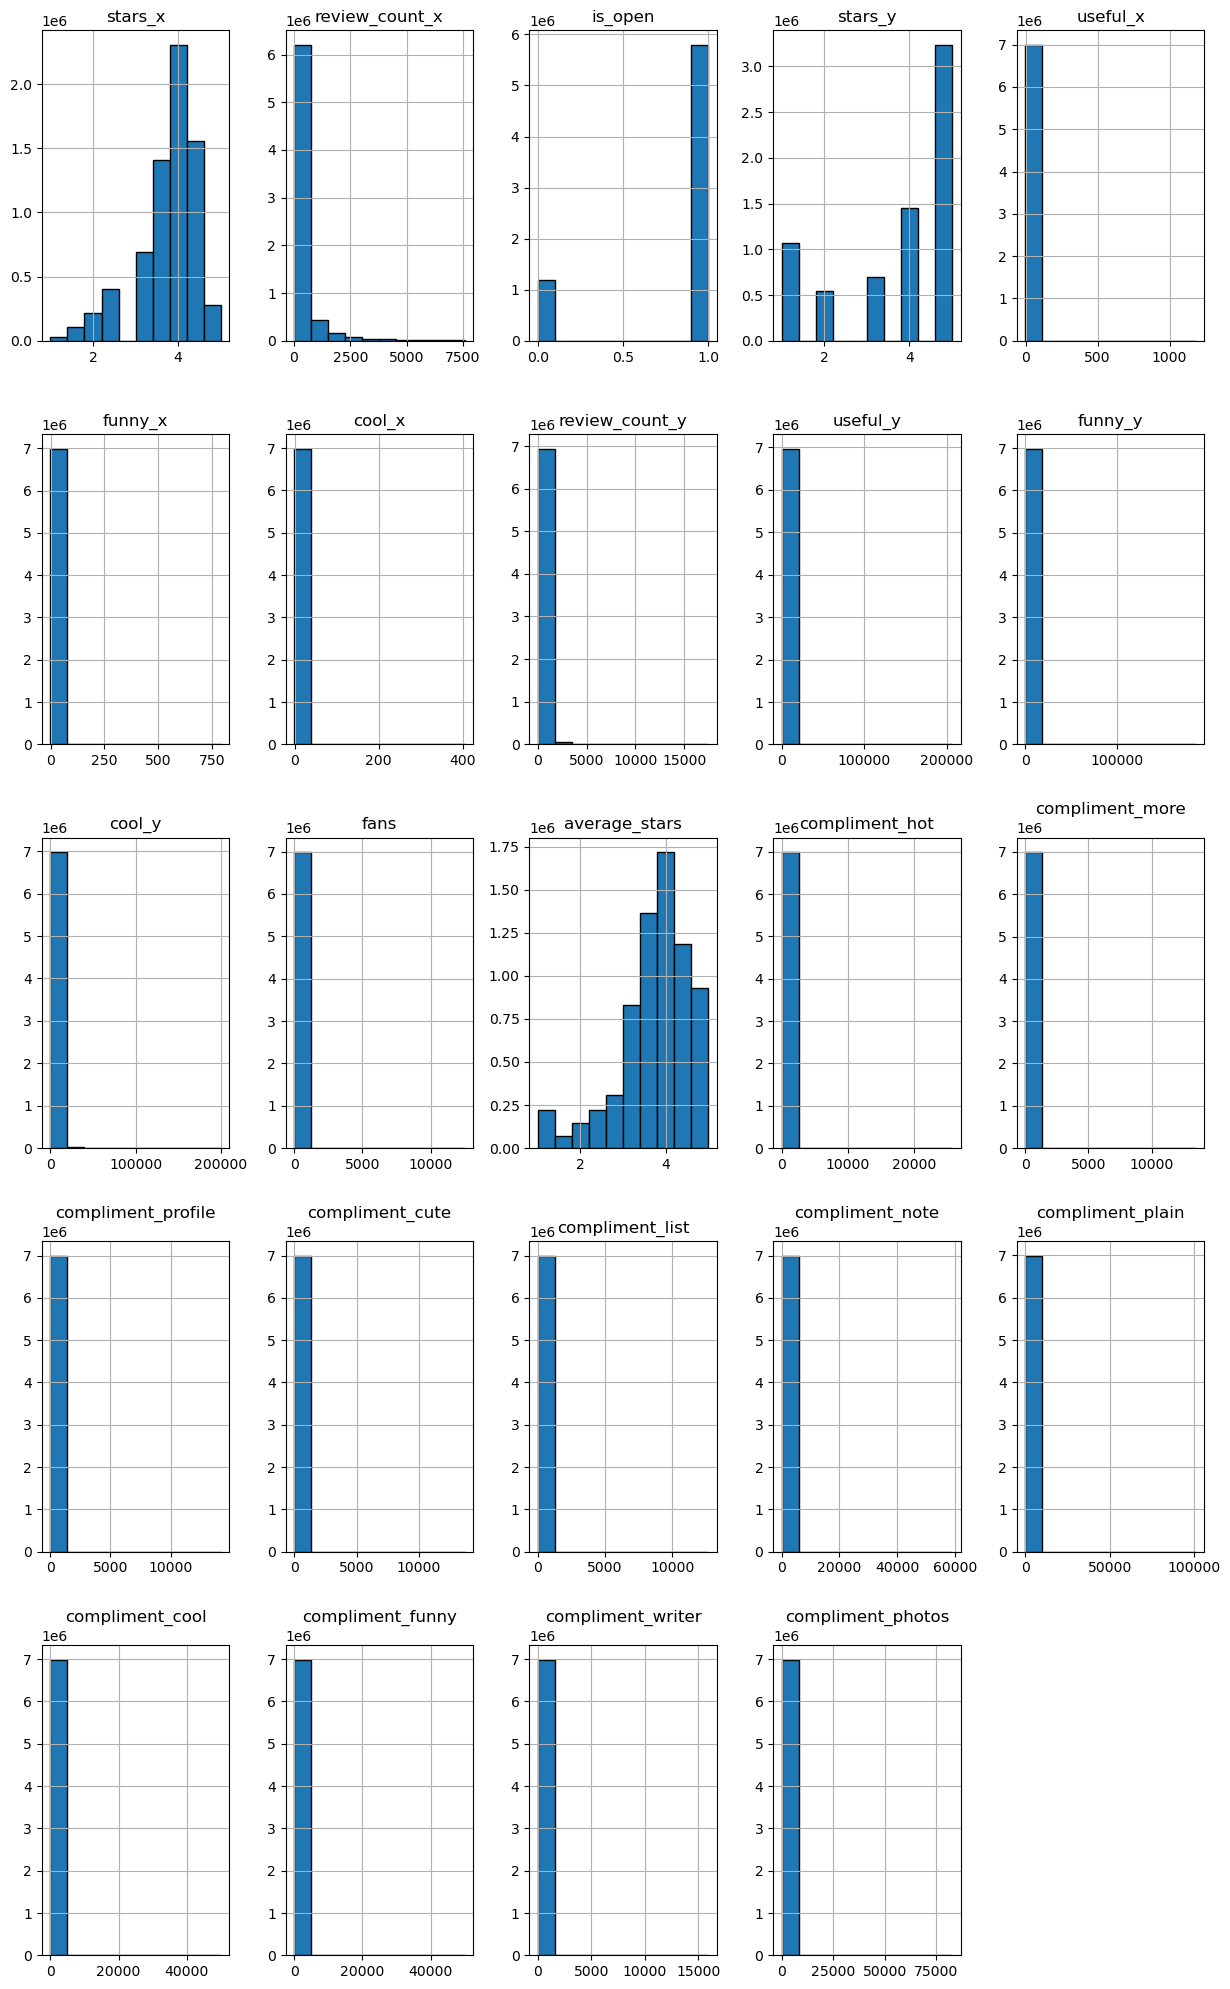

In [28]:
# Create histograms for numeric data
import numpy as np
import matplotlib as plt
import seaborn as sns
dataset_df = merged_df.select_dtypes(include=[np.number])
dataset_df.hist(bins=10, figsize=(15, 25), layout=(-1, 5), edgecolor="black")

# Correlation plot
# Compute the correlation matrix
import matplotlib.pyplot as plt
corr_matrix = dataset_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
sns.heatmap(dataset_df.select_dtypes(include=['number']).corr(),annot=True,cmap='RdBu')

plt.title("Correlation",fontsize=20)
plt.show()

col= ['stars_x','review_count_x','is_open']
dataset_df =dataset_df[col]
sns.pairplot(dataset_df, hue='is_open')
plt.show()

col= ['stars_x', 'review_count_x', 'is_open',
     'review_count_y','average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos']
dataset_df_numerical =dataset_df[col]
dataset_df_numerical.head()

dataset_df_numerical.describe()

dataset_df=dataset_df[:100000]
sns.heatmap(dataset_df.select_dtypes(include=['number']).corr(),annot=True,cmap='RdBu')

plt.title("Correlation",fontsize=20)
plt.show()

sns.pairplot(dataset_df, hue='is_open')
plt.show()

dataset_df_numerical.shape

FEATURE ENGINEERING - PRE_PROCESSING

In [485]:
merged_df.to_csv('dataset.csv')

In [5]:
import pandas as pd

In [7]:
dataset_df = pd.read_csv('dataset.csv')

In [9]:
dataset_df_slice = dataset_df[:100000]

In [11]:
dataset_df = dataset_df[:50000]


In [13]:
dataset_df=dataset_df.drop(['user_id','name_x','categories'], axis=1)

In [15]:
dataset_df.head()

,business_id,city,stars_x,review_count_x,is_open,hours,stars_y,useful_x,funny_x,cool_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,NaN,5,3,2,1,...,0,0,0,0,2,3,1,1,1,0
1,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,NaN,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,NaN,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,NaN,5,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,NaN,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dataset_df.isna().sum()

business_id               0
city                      0
stars_x                   0
review_count_x            0
is_open                   0
hours                  2538
stars_y                   0
useful_x                  0
funny_x                   0
cool_x                    0
date                      0
name_y                    3
review_count_y            0
yelping_since             0
useful_y                  0
funny_y                   0
cool_y                    0
elite                 37576
friends               13558
fans                      0
average_stars             0
compliment_hot            0
compliment_more           0
compliment_profile        0
compliment_cute           0
compliment_list           0
compliment_note           0
compliment_plain          0
compliment_cool           0
compliment_funny          0
compliment_writer         0
compliment_photos         0
dtype: int64

In [19]:
dataset_df=dataset_df.drop(['elite','friends','hours'], axis=1)

In [21]:
dataset_df.head()

,business_id,city,stars_x,review_count_x,is_open,stars_y,useful_x,funny_x,cool_x,date,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,3,2,1,2012-05-02 18:07:38,...,0,0,0,0,2,3,1,1,1,0
1,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,1,0,0,2013-03-01 06:11:05,...,0,0,0,0,0,0,0,0,0,0
2,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,4,2,0,0,2013-01-17 00:05:43,...,0,0,0,0,0,0,0,0,0,0
3,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,0,1,0,2015-03-16 03:43:08,...,0,0,0,0,1,0,0,0,0,0
4,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,0,0,0,2013-03-05 18:45:07,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dataset_df.nunique(axis=0)

business_id             977
city                    224
stars_x                   9
review_count_x          179
is_open                   2
stars_y                   5
useful_x                 59
funny_x                  37
cool_x                   46
date                  49995
name_y                 8981
review_count_y         1328
yelping_since         44390
useful_y               2315
funny_y                1478
cool_y                 1781
fans                    389
average_stars           387
compliment_hot          475
compliment_more         156
compliment_profile      133
compliment_cute         122
compliment_list          89
compliment_note         435
compliment_plain        652
compliment_cool         641
compliment_funny        641
compliment_writer       366
compliment_photos       393
dtype: int64

In [25]:
dataset_df.head()

,business_id,city,stars_x,review_count_x,is_open,stars_y,useful_x,funny_x,cool_x,date,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,3,2,1,2012-05-02 18:07:38,...,0,0,0,0,2,3,1,1,1,0
1,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,1,0,0,2013-03-01 06:11:05,...,0,0,0,0,0,0,0,0,0,0
2,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,4,2,0,0,2013-01-17 00:05:43,...,0,0,0,0,0,0,0,0,0,0
3,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,0,1,0,2015-03-16 03:43:08,...,0,0,0,0,1,0,0,0,0,0
4,Pns2l4eNsfO8kk83dixA6A,Santa Barbara,5.0,7,0,5,0,0,0,2013-03-05 18:45:07,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dataset_df.nunique(axis=0)

business_id             977
city                    224
stars_x                   9
review_count_x          179
is_open                   2
stars_y                   5
useful_x                 59
funny_x                  37
cool_x                   46
date                  49995
name_y                 8981
review_count_y         1328
yelping_since         44390
useful_y               2315
funny_y                1478
cool_y                 1781
fans                    389
average_stars           387
compliment_hot          475
compliment_more         156
compliment_profile      133
compliment_cute         122
compliment_list          89
compliment_note         435
compliment_plain        652
compliment_cool         641
compliment_funny        641
compliment_writer       366
compliment_photos       393
dtype: int64

In [29]:
dataset_df.shape


(50000, 29)

In [31]:
X=dataset_df.drop(['is_open','business_id'],axis=1)

In [33]:
Y=dataset_df['is_open']

In [35]:
# Splitting the Test and Train values of X and Y
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=110)

#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) # 0.2 x 0.8 = 0.2

In [37]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [39]:
X_train.shape

(32000, 27)

In [41]:
X_train.head()

,city,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,date,name_y,review_count_y,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
28859,Isla Vista,3.0,184,3,0,0,0,2015-10-04 04:41:48,Dorothy,135,...,0,0,0,0,3,1,0,0,0,1
29211,Mount Juliet,4.5,246,4,5,0,1,2017-11-28 02:58:10,Vrithi,57,...,6,0,0,0,3,5,8,8,4,2
25930,Tucson,3.5,92,3,1,0,0,2012-11-28 17:41:21,Ming-Min,145,...,4,2,0,2,11,5,19,19,6,0
9427,Santa Barbara,4.0,2404,2,1,0,0,2019-07-09 17:02:45,Elisa,47,...,2,3,0,0,1,0,0,0,1,0
5024,Plainfield,4.5,24,5,5,1,1,2014-07-18 11:24:42,Haley,100,...,1,0,0,1,7,13,5,5,12,10


In [43]:
X_train.nunique(axis=0)

city                    224
stars_x                   9
review_count_x          179
stars_y                   5
useful_x                 54
funny_x                  34
cool_x                   43
date                  31997
name_y                 6745
review_count_y         1184
yelping_since         29412
useful_y               1981
funny_y                1230
cool_y                 1494
fans                    343
average_stars           373
compliment_hot          392
compliment_more         140
compliment_profile      117
compliment_cute         100
compliment_list          75
compliment_note         379
compliment_plain        548
compliment_cool         539
compliment_funny        539
compliment_writer       328
compliment_photos       342
dtype: int64

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 28859 to 48933
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                32000 non-null  object 
 1   stars_x             32000 non-null  float64
 2   review_count_x      32000 non-null  int64  
 3   stars_y             32000 non-null  int64  
 4   useful_x            32000 non-null  int64  
 5   funny_x             32000 non-null  int64  
 6   cool_x              32000 non-null  int64  
 7   date                32000 non-null  object 
 8   name_y              31998 non-null  object 
 9   review_count_y      32000 non-null  int64  
 10  yelping_since       32000 non-null  object 
 11  useful_y            32000 non-null  int64  
 12  funny_y             32000 non-null  int64  
 13  cool_y              32000 non-null  int64  
 14  fans                32000 non-null  int64  
 15  average_stars       32000 non-null  float64
 16  compl

In [376]:
X_train.to_csv('X_Train.csv')

In [47]:
X_train.describe()

,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,review_count_y,useful_y,funny_y,cool_y,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,3.762703,423.473406,3.758000,1.146937,0.308000,0.461406,126.646531,448.665406,196.678219,308.820469,...,2.729250,1.905594,1.150594,0.828875,15.775406,43.170156,31.275375,31.275375,12.297875,14.468750
std,0.730911,657.260362,1.461357,2.725565,1.300433,1.774995,376.954397,3653.114186,2489.539462,3213.559038,...,41.633753,57.540711,26.234377,25.208338,144.697674,690.680986,394.272787,394.272787,157.934554,356.264495
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,50.000000,3.000000,0.000000,0.000000,0.000000,7.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,161.000000,4.000000,0.000000,0.000000,0.000000,25.000000,20.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,402.000000,5.000000,1.000000,0.000000,0.000000,100.000000,111.000000,25.000000,39.000000,...,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
max,5.000000,2404.000000,5.000000,88.000000,63.000000,89.000000,17473.000000,206296.000000,185823.000000,195814.000000,...,4347.000000,7039.000000,2974.000000,2607.000000,13970.000000,101097.000000,49967.000000,49967.000000,15934.000000,56104.000000


In [49]:

from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore',max_categories=30)



# Perform one-hot encoding on the 'category_column'
# Fit the encoder and transform the data
one_hot_encoded = encoder.fit_transform(X_train[['city']])

# Convert the encoded data to a DataFrame with meaningful column names
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['city']))

# Concatenate the new one-hot encoded columns back to the original DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), one_hot_encoded_df.reset_index(drop=True)], axis=1)

# Optionally, drop the original categorical column
X_train.drop('city', axis=1, inplace=True)
X_train.head()
           

,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,date,name_y,review_count_y,yelping_since,...,city_Santa Barbara,city_Southampton,city_Sparks,city_St Louis,city_St. Louis,city_Tampa,city_Town and Country,city_Tucson,city_Wesley Chapel,city_infrequent_sklearn
0,3.0,184,3,0,0,0,2015-10-04 04:41:48,Dorothy,135,2014-04-14 00:53:37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.5,246,4,5,0,1,2017-11-28 02:58:10,Vrithi,57,2015-10-26 16:50:01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,92,3,1,0,0,2012-11-28 17:41:21,Ming-Min,145,2010-11-28 05:12:02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,2404,2,1,0,0,2019-07-09 17:02:45,Elisa,47,2017-10-20 00:05:04,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.5,24,5,5,1,1,2014-07-18 11:24:42,Haley,100,2010-09-24 16:50:32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
X_train.shape

(32000, 55)

In [53]:
X_train.describe()

,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,review_count_y,useful_y,funny_y,cool_y,...,city_Santa Barbara,city_Southampton,city_Sparks,city_St Louis,city_St. Louis,city_Tampa,city_Town and Country,city_Tucson,city_Wesley Chapel,city_infrequent_sklearn
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,3.762703,423.473406,3.758000,1.146937,0.308000,0.461406,126.646531,448.665406,196.678219,308.820469,...,0.079531,0.012469,0.007281,0.005375,0.011156,0.043875,0.006687,0.051594,0.015969,0.173500
std,0.730911,657.260362,1.461357,2.725565,1.300433,1.774995,376.954397,3653.114186,2489.539462,3213.559038,...,0.270570,0.110967,0.085020,0.073118,0.105034,0.204820,0.081505,0.221209,0.125356,0.378685
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,50.000000,3.000000,0.000000,0.000000,0.000000,7.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,161.000000,4.000000,0.000000,0.000000,0.000000,25.000000,20.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,402.000000,5.000000,1.000000,0.000000,0.000000,100.000000,111.000000,25.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2404.000000,5.000000,88.000000,63.000000,89.000000,17473.000000,206296.000000,185823.000000,195814.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stars_x                  32000 non-null  float64
 1   review_count_x           32000 non-null  int64  
 2   stars_y                  32000 non-null  int64  
 3   useful_x                 32000 non-null  int64  
 4   funny_x                  32000 non-null  int64  
 5   cool_x                   32000 non-null  int64  
 6   date                     32000 non-null  object 
 7   name_y                   31998 non-null  object 
 8   review_count_y           32000 non-null  int64  
 9   yelping_since            32000 non-null  object 
 10  useful_y                 32000 non-null  int64  
 11  funny_y                  32000 non-null  int64  
 12  cool_y                   32000 non-null  int64  
 13  fans                     32000 non-null  int64  
 14  average_stars         

In [57]:
X_val.nunique(axis=0)

city                   202
stars_x                  9
review_count_x         179
stars_y                  5
useful_x                35
funny_x                 19
cool_x                  28
date                  8000
name_y                2695
review_count_y         771
yelping_since         7781
useful_y              1070
funny_y                649
cool_y                 804
fans                   209
average_stars          347
compliment_hot         213
compliment_more         82
compliment_profile      63
compliment_cute         51
compliment_list         43
compliment_note        218
compliment_plain       291
compliment_cool        291
compliment_funny       291
compliment_writer      183
compliment_photos      178
dtype: int64

In [59]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore',max_categories=30)



# Perform one-hot encoding on the 'category_column'
# Fit the encoder and transform the data
one_hot_encoded = encoder.fit_transform(X_val[['city']])

# Convert the encoded data to a DataFrame with meaningful column names
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['city']))

# Concatenate the new one-hot encoded columns back to the original DataFrame
X_val = pd.concat([X_val.reset_index(drop=True), one_hot_encoded_df.reset_index(drop=True)], axis=1)
# Optionally, drop the original categorical column
X_val.drop('city', axis=1, inplace=True)
X_val.head()

,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,date,name_y,review_count_y,yelping_since,...,city_Santa Barbara,city_Southampton,city_Sparks,city_St Louis,city_St. Louis,city_Tampa,city_Town and Country,city_Tucson,city_Wesley Chapel,city_infrequent_sklearn
0,4.5,86,5,0,0,0,2014-11-16 16:01:59,Maria,10,2012-10-14 11:55:36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.5,572,4,2,0,0,2013-05-29 19:22:11,Kylie,28,2012-01-09 14:09:38,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,67,1,2,1,0,2014-10-28 02:47:48,Pam,1,2014-05-20 01:57:55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.5,45,1,0,0,0,2015-12-17 21:22:22,Amanda,3,2015-06-28 19:59:25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.5,20,1,0,0,0,2017-02-09 06:35:49,Robbie,42,2015-02-20 01:20:03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stars_x                  8000 non-null   float64
 1   review_count_x           8000 non-null   int64  
 2   stars_y                  8000 non-null   int64  
 3   useful_x                 8000 non-null   int64  
 4   funny_x                  8000 non-null   int64  
 5   cool_x                   8000 non-null   int64  
 6   date                     8000 non-null   object 
 7   name_y                   7999 non-null   object 
 8   review_count_y           8000 non-null   int64  
 9   yelping_since            8000 non-null   object 
 10  useful_y                 8000 non-null   int64  
 11  funny_y                  8000 non-null   int64  
 12  cool_y                   8000 non-null   int64  
 13  fans                     8000 non-null   int64  
 14  average_stars           

In [63]:
missing_in_train = set(X_val.columns) - set(X_train.columns)
missing_in_val = set(X_train.columns) - set(X_val.columns)

print("Missing in train:", missing_in_train)
print("Missing in validation:", missing_in_val)


Missing in train: {'city_Hernando Beach', 'city_Fishers'}
Missing in validation: {'city_Isla Vista', 'city_Largo'}


In [65]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Align the columns between train and validation
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)


In [66]:
X_train.head()

,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,review_count_y,useful_y,funny_y,cool_y,...,yelping_since_2022-01-14 14:11:18,yelping_since_2022-01-15 16:29:49,yelping_since_2022-01-15 17:14:52,yelping_since_2022-01-16 15:30:31,yelping_since_2022-01-17 03:03:39,yelping_since_2022-01-18 05:42:13,yelping_since_2022-01-18 16:04:58,yelping_since_2022-01-18 23:28:31,yelping_since_2022-01-18 23:30:49,yelping_since_2022-01-19 01:48:00
0,3.0,184,3,0,0,0,135,75,25,15,...,False,False,False,False,False,False,False,False,False,False
1,4.5,246,4,5,0,1,57,78,26,51,...,False,False,False,False,False,False,False,False,False,False
2,3.5,92,3,1,0,0,145,409,101,107,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2404,2,1,0,0,47,27,13,13,...,False,False,False,False,False,False,False,False,False,False
4,4.5,24,5,5,1,1,100,296,95,116,...,False,False,False,False,False,False,False,False,False,False


In [67]:
X_val.head()

,stars_x,review_count_x,stars_y,useful_x,funny_x,cool_x,review_count_y,useful_y,funny_y,cool_y,...,yelping_since_2022-01-14 14:11:18,yelping_since_2022-01-15 16:29:49,yelping_since_2022-01-15 17:14:52,yelping_since_2022-01-16 15:30:31,yelping_since_2022-01-17 03:03:39,yelping_since_2022-01-18 05:42:13,yelping_since_2022-01-18 16:04:58,yelping_since_2022-01-18 23:28:31,yelping_since_2022-01-18 23:30:49,yelping_since_2022-01-19 01:48:00
0,4.5,86,5,0,0,0,10,4,3,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,572,4,2,0,0,28,72,11,19,...,0,0,0,0,0,0,0,0,0,0
2,3.5,67,1,2,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.5,45,1,0,0,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.5,20,1,0,0,0,42,33,17,10,...,0,0,0,0,0,0,0,0,0,0


In [405]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(Y_val, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


In [471]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(Y_val, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [475]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore',max_categories=30)



# Perform one-hot encoding on the 'category_column'
# Fit the encoder and transform the data
one_hot_encoded = encoder.fit_transform(X_test[['city']])

# Convert the encoded data to a DataFrame with meaningful column names
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['city']))

# Concatenate the new one-hot encoded columns back to the original DataFrame
X_test = pd.concat([X_test.reset_index(drop=True), one_hot_encoded_df.reset_index(drop=True)], axis=1)

# Optionally, drop the original categorical column
X_test.drop('city', axis=1, inplace=True)
X_test.head()

,review_count_x,stars_y,review_count_y,useful_y,funny_y,cool_y,average_stars,compliment_hot,compliment_more,compliment_profile,...,city_Saint Louis,city_Santa Barbara,city_St. Petersburg,city_Tampa,city_Treasure Island,city_Tucson,city_Wesley Chapel,city_West Chester,city_Wilmington,city_infrequent_sklearn
0,2404,5,85,122,73,91,4.73,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,5,23,29,7,4,4.37,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2404,4,11,7,1,1,4.45,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,605,5,14,10,10,3,4.20,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2404,2,72,15,0,5,3.87,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [477]:
missing_in_train = set(X_test.columns) - set(X_train.columns)
missing_in_X_test= set(X_train.columns) - set(X_test.columns)

print("Missing in train:", missing_in_train)
print("Missing in validation:", missing_in_val)


Missing in train: {'city_St. Petersburg', 'city_Plainfield', 'city_Exton', 'city_Bala Cynwyd'}
Missing in validation: {'city_Blue Bell', 'city_Land O Lakes', 'city_Woodbury', 'city_Alton'}


In [479]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns between train and validation
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [483]:
X_test.head()

,review_count_x,stars_y,review_count_y,useful_y,funny_y,cool_y,average_stars,compliment_hot,compliment_more,compliment_profile,...,city_Wesley Chapel,city_Wesley Chapel,city_West Chester,city_West Chester,city_Williamstown,city_Wilmington,city_Wilmington,city_Woodbury,city_infrequent_sklearn,city_infrequent_sklearn
0,2404,5,85,122,73,91,4.73,1,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
1,32,5,23,29,7,4,4.37,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
2,2404,4,11,7,1,1,4.45,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
3,605,5,14,10,10,3,4.20,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
4,2404,2,72,15,0,5,3.87,0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
